In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv('churn_Modelling.csv')

In [3]:
df.head()
df.shape

(10000, 14)

In [4]:
df = df.drop(df.columns[[0,1,2]],axis = 1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
pd.get_dummies(df[['Geography','Gender']])

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_x = LabelEncoder()
df['Geography'] = le_x.fit_transform(df['Geography'])
le  = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
y = df['Exited'].values
df = df.drop(['Exited'],axis = 1)

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
column_trans = make_column_transformer((OneHotEncoder(),['Geography']),remainder = 'passthrough')

In [12]:
X = column_trans.fit_transform(df)

In [13]:
X = X.astype(float)

In [14]:
X.astype(int)

array([[     1,      0,      0, ...,      1,      1, 101348],
       [     0,      0,      1, ...,      0,      1, 112542],
       [     1,      0,      0, ...,      1,      0, 113931],
       ...,
       [     1,      0,      0, ...,      0,      1,  42085],
       [     0,      1,      0, ...,      1,      0,  92888],
       [     1,      0,      0, ...,      1,      0,  38190]])

In [15]:
X = X.astype(int)

In [16]:
X[0:5]

array([[     1,      0,      0,    619,      0,     42,      2,      0,
             1,      1,      1, 101348],
       [     0,      0,      1,    608,      0,     41,      1,  83807,
             1,      0,      1, 112542],
       [     1,      0,      0,    502,      0,     42,      8, 159660,
             3,      1,      0, 113931],
       [     1,      0,      0,    699,      0,     39,      1,      0,
             2,      0,      0,  93826],
       [     0,      0,      1,    850,      0,     43,      2, 125510,
             1,      1,      1,  79084]])

In [17]:
X = X[:,1:]

In [18]:
X[0:5]

array([[     0,      0,    619,      0,     42,      2,      0,      1,
             1,      1, 101348],
       [     0,      1,    608,      0,     41,      1,  83807,      1,
             0,      1, 112542],
       [     0,      0,    502,      0,     42,      8, 159660,      3,
             1,      0, 113931],
       [     0,      0,    699,      0,     39,      1,      0,      2,
             0,      0,  93826],
       [     0,      1,    850,      0,     43,      2, 125510,      1,
             1,      1,  79084]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
X_train.shape
X_train[0:5]

array([[-0.5698444 ,  1.74309049,  0.16958176, -1.09168714, -0.46460796,
         0.00666099, -1.21571672,  0.8095029 ,  0.64259497, -1.03227043,
         1.10642907],
       [ 1.75486502, -0.57369368, -2.30455945,  0.91601335,  0.30102557,
        -1.37744033, -0.00631522, -0.92159124,  0.64259497,  0.9687384 ,
        -0.74865592],
       [-0.5698444 , -0.57369368, -1.19119591, -1.09168714, -0.94312892,
        -1.031415  ,  0.57993634, -0.92159124,  0.64259497, -1.03227043,
         1.48532999],
       [-0.5698444 ,  1.74309049,  0.03556578,  0.91601335,  0.10961719,
         0.00666099,  0.47312433, -0.92159124,  0.64259497, -1.03227043,
         1.27653473],
       [-0.5698444 ,  1.74309049,  2.05611444, -1.09168714,  1.73658844,
         1.04473698,  0.8101958 ,  0.8095029 ,  0.64259497,  0.9687384 ,
         0.55837844]])

In [22]:
classifier1 = Sequential()
classifier1.add(Dense(units = 6,activation = 'relu',input_dim = 11))
classifier1.add(Dense(units = 6,activation = 'relu'))
classifier1.add(Dense(units = 6,activation = 'relu'))
classifier1.add(Dense(units = 1,activation = 'sigmoid'))
classifier1.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
classifier1.fit(X_train,y_train,batch_size =32 ,epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 0s 52us/step - loss: 0.5834 - accuracy: 0.7174
Epoch 2/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.4783 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.4566 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.4437 - accuracy: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 70us/step - loss: 0.4367 - accuracy: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 68us/step - loss: 0.4309 - accuracy: 0.7962
Epoch 7/100
8000/8000 [==============================] - 1s 71us/step - loss: 0.4214 - accuracy: 0.8069
Epoch 8/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.4055 - accuracy: 0.8210
Epoch 9/100
8000/8000 [==============================] - 0s 35us/step - loss: 0.3845 - accuracy: 0.8356
Epoch 10/100
8000/8000 [==============================] - 0s 33u

8000/8000 [==============================] - 0s 52us/step - loss: 0.3290 - accuracy: 0.8658
Epoch 80/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.3285 - accuracy: 0.8665
Epoch 81/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.3287 - accuracy: 0.8662
Epoch 82/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.3295 - accuracy: 0.8646
Epoch 83/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3285 - accuracy: 0.8659
Epoch 84/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.3286 - accuracy: 0.8665
Epoch 85/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3288 - accuracy: 0.8656
Epoch 86/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.3284 - accuracy: 0.8652
Epoch 87/100
8000/8000 [==============================] - 1s 65us/step - loss: 0.3283 - accuracy: 0.8668
Epoch 88/100
8000/8000 [==============================] - 1s 66us/st

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = classifier1.predict(X_test)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[1487  108]
 [ 184  221]]


<AxesSubplot:>

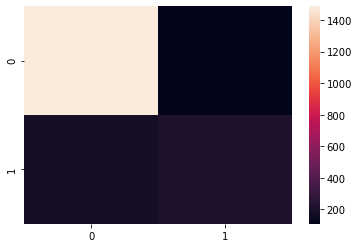

In [24]:
sns.heatmap(cm)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.67      0.55      0.60       405

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000

